In [108]:
import pandas as pd
import zipfile # it is used for reading the zip file without extrating
import numpy as np
import matplotlib.pyplot as plt

## RQ1

In [2]:
with zipfile.ZipFile("Soccer Data\matches.zip") as Z:
    with Z.open("matches_England.json") as f:
        matches_df = pd.read_json(f)

## Matche Data Frame

In [3]:
matches_df.head(2)

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090


In [4]:
point_data = list()
for i in range(len(matches_df)):
    gameweek = matches_df.iloc[i].gameweek# iloc is used for the locating data in a data frame
    label = matches_df.iloc[i].label
    [[home_team, away_team], [home_score, away_score]] = [[o.strip() for o in s.split('-')] for s in label.split(',')]# here we have converted the label column into a nested list, od home team/away team . HOme score and Away score 
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score > away_score:# we have identified the winner /looser and Draw
        home_point = 3
        away_point = 0
    if away_score > home_score:
        away_point = 3
        home_point = 0
    if away_score == home_score:
        home_point = 1
        away_point = 1
    point_data.append([gameweek, home_team, home_point]) #here we have summarize the team with week and point all together
    point_data.append([gameweek, away_team, away_point])
point_df = pd.DataFrame(point_data, columns=['gameweek', 'team', 'point']) #setup a datafram

## Summarize Dataframe on the terms of Teams and Point in the weeks

In [5]:
point_df.head(5)

,gameweek,team,point
0,38,Burnley,0
1,38,AFC Bournemouth,3
2,38,Crystal Palace,3
3,38,West Bromwich Albion,0
4,38,Huddersfield Town,0


## Final Plotting of Data

Text(0, 0.5, 'Points')

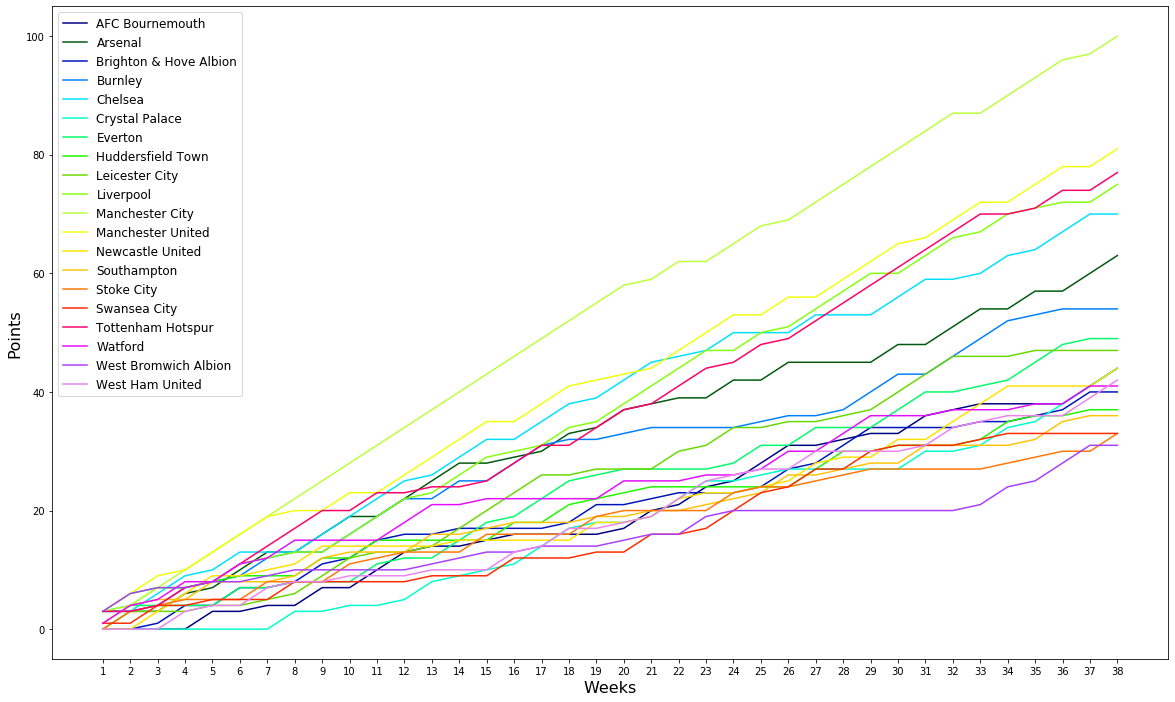

In [6]:
colormap = plt.cm.gist_ncar #gist_ncar is a tool for pick colour based of the float numbers

team_table = point_df.pivot(index= 'gameweek', columns='team', values=['point']).cumsum().fillna(method = 'backfill').fillna(method='ffill')
plt.figure(figsize=[20,12])
color = [colormap(i) for i in np.linspace(0, 0.9, len(team_table.columns))]
[plt.plot(team_table.iloc[:,i], color = color[i]) for i in range(len(team_table.columns))]
plt.legend([team_table.columns[i][1] for i in range(len(team_table.columns))], fontsize=12)
plt.xticks(team_table.index)
plt.xlabel("Weeks", fontsize=16)
plt.ylabel("Points", fontsize=16)

The Manchester City has the longest winning streak from week 2 till week 20, followed by the runner-up team in longest winning streak is Tottenham Hotspur from week 25 to week 32.

The team West Bromwich Albion has the longest lossing streak from week 24 till 32, followed by second longest lossing streak by Crystal Palace with effect from week 1 till week 7.


## RQ2

null hypothesis : if a team is playing in Home or away it will not effect their performance ;
Alternative Hypo: if team is playing in their home it effects performance;
we considered ALPHA as 5% 

In [7]:
point_data = list()
result = {1 : "draw", 0 : "lost", 3: "win"}
for i in range(len(matches_df)):
    gameweek = matches_df.iloc[i].gameweek
    label = matches_df.iloc[i].label
    [[home_team, away_team], [home_score, away_score]] = [[o.strip() for o in s.split('-')] for s in label.split(',')]
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score > away_score:## setting up the Scoring Mechanism
        home_point = 3
        away_point = 0
    if away_score > home_score:
        away_point = 3
        home_point = 0
    if away_score == home_score:
        home_point = 1
        away_point = 1
    point_data.append([gameweek, home_team, home_point, 'home', result[home_point]])
    point_data.append([gameweek, away_team, away_point, 'away', result[away_point]])

In [8]:
point_df = pd.DataFrame(point_data, columns=['gameweek', 'team', 'point', 'home_away', 'result'])
point_df.head(5)

,gameweek,team,point,home_away,result
0,38,Burnley,0,home,lost
1,38,AFC Bournemouth,3,away,win
2,38,Crystal Palace,3,home,win
3,38,West Bromwich Albion,0,away,lost
4,38,Huddersfield Town,0,home,lost


## Final Dataset:Filtered and Selected 5 Teams

In [9]:
teams = ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester United', 'Manchester City']
point_df_selected = point_df[[t in teams for t in point_df['team']]]
tab = pd.crosstab(index=[point_df_selected['team'],point_df_selected['home_away']], columns=point_df_selected['result'])

## Final Dataset

In [10]:
tab

result                       draw  lost  win
team              home_away                 
Arsenal           away          4    11    4
                  home          2     2   15
Chelsea           away          3     6   10
                  home          4     4   11
Liverpool         away          5     5    9
                  home          7     0   12
Manchester City   away          2     1   16
                  home          2     1   16
Manchester United away          4     5   10
                  home          2     2   15

## Results

In [11]:
from scipy.stats import chi2_contingency

In [12]:
tab.iloc[:2,:]## the result table

result             draw  lost  win
team    home_away                 
Arsenal away          4    11    4
        home          2     2   15

In [13]:
chi2_contingency(tab.iloc[:2,:].values) ## the NULL hypothesis is rejected

(13.265856950067477, 0.001316302676697684, 2, array([[3. , 6.5, 9.5],
        [3. , 6.5, 9.5]]))

In [14]:
tab.iloc[2:4,:]

result             draw  lost  win
team    home_away                 
Chelsea away          3     6   10
        home          4     4   11

In [15]:
chi2_contingency(tab.iloc[2:4,:].values)## the NULL hypothesis is not rejected

(0.5904761904761905, 0.7443543391421505, 2, array([[ 3.5,  5. , 10.5],
        [ 3.5,  5. , 10.5]]))

In [16]:
tab.iloc[4:6,:]

result               draw  lost  win
team      home_away                 
Liverpool away          5     5    9
          home          7     0   12

In [17]:
chi2_contingency(tab.iloc[4:6,:].values)## the NULL hypothesis is not rejected

(5.761904761904762, 0.05608132660510643, 2, array([[ 6. ,  2.5, 10.5],
        [ 6. ,  2.5, 10.5]]))

In [18]:
tab.iloc[6:8,:]

result                     draw  lost  win
team            home_away                 
Manchester City away          2     1   16
                home          2     1   16

In [19]:
chi2_contingency(tab.iloc[6:8,:].values)## the NULL hypothesis is not rejected

(0.0, 1.0, 2, array([[ 2.,  1., 16.],
        [ 2.,  1., 16.]]))

In [20]:
tab.iloc[8:10,:]

result                       draw  lost  win
team              home_away                 
Manchester United away          4     5   10
                  home          2     2   15

In [21]:
chi2_contingency(tab.iloc[8:10,:].values)## the NULL hypothesis is not rejected

(2.9523809523809526, 0.22850653346991975, 2, array([[ 3. ,  3.5, 12.5],
        [ 3. ,  3.5, 12.5]]))

Arsenal is the only team with p-value less than 5%

## RQ3

## Import Teams Data

In [22]:
teams_df = pd.read_json('soccer data/teams.json', orient = 'values')
teams_df.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


## Filtering the Teams Data for RQ3

In [23]:
teams_df = teams_df.loc[[str(t).find('England') != -1 for t in teams_df.area]]# fileted only 'England' from AREA for Premiere league
teams_df = teams_df.loc[[str(t).find('club') != -1 for t in teams_df.type]]# filtered for TYPE 'club' Only

In [24]:
teams_df.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646


## Import Coach Data

In [25]:
coaches_df = pd.read_json('soccer data/coaches.json', orient = 'values')
coaches_df.head()

,birthArea,birthDate,currentTeamId,firstName,lastName,middleName,passportArea,shortName,wyId
0,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",None,0,César Domingo,Mendiondo López,,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",Cesar Domingo,275580
1,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1945-05-09,0,Josef,Heynckes,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",J. Heynckes,14710
2,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1956-06-16,0,Giovanni,De Biasi,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",G. De Biasi,135480
3,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1965-08-14,674,Marcelino,García Toral,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Marcelino,210074
4,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1974-04-02,0,Tayfun,Korkut,,"{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",T. Korkut,293398


## Joining the two data frame with a key

In [26]:
coaches_teams_df = pd.merge(left=teams_df, right=coaches_df,
                            left_on='wyId', right_on='currentTeamId',
                            how='inner')[['name', 'birthDate', 'shortName']].groupby('name').agg('max', on = 'birthDate').sort_values(by='birthDate', ascending = False)
now = pd.Timestamp('now')## for current time
age = (now - pd.to_datetime(coaches_teams_df['birthDate'], yearfirst=True)).astype('<m8[Y]')## to calculate the age of coaches
coaches_teams_df['age'] = age

## Result 1 : The Ranking

In [27]:
print(coaches_teams_df.head(10))

                    birthDate       shortName   age
name                                               
AFC Bournemouth    1977-11-29         E. Howe  41.0
Everton            1977-07-12     Marco Silva  42.0
Newcastle United   1973-02-19  Rafael Benítez  46.0
Tottenham Hotspur  1972-03-02   M. Pochettino  47.0
Arsenal            1971-11-03      Unai Emery  47.0
Burnley            1971-06-28        S. Dyche  48.0
Manchester City    1971-01-18       Guardiola  48.0
Watford            1970-05-01     Javi Gracia  49.0
Southampton        1967-08-09   R. Hasenhüttl  52.0
Liverpool          1967-06-16        J. Klopp  52.0


## Result 2: The distribution (Boxplot)

The coloured line in the box is the average of ages, upper and lower edges of the box reflects Q3 and Q1.
The two Circles on the top are the outliers ageing more that 60 years.
We observed that ages are centered around 47 to 52 Years.

Text(0.5, 1.0, 'Boxplot of Coaches Ages')

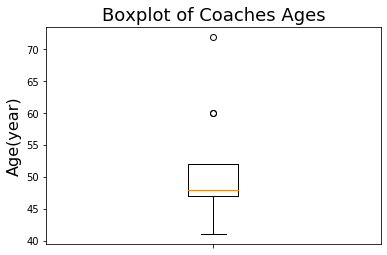

In [28]:
plt.boxplot(age)
plt.ylabel('Age(year)', fontsize=16)
plt.xticks([1], [''])
plt.title('Boxplot of Coaches Ages', fontsize=18)

## RQ4

## Importing the Event File

In [29]:
with zipfile.ZipFile("Soccer Data\events.zip") as Z:
    with Z.open('events_England.json') as f:
        events_df = pd.read_json(f)

In [30]:
events_df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


## Driving the Desired Column

In [31]:
passes_df = events_df[['playerId', 'matchId', 'eventName', 'tags']]
passes_df.head()

,playerId,matchId,eventName,tags
0,25413,2499719,Pass,[{'id': 1801}]
1,370224,2499719,Pass,[{'id': 1801}]
2,3319,2499719,Pass,[{'id': 1801}]
3,120339,2499719,Pass,[{'id': 1801}]
4,167145,2499719,Pass,[{'id': 1801}]


## Passes Assesment

In [32]:
passes_df = passes_df.loc[passes_df.eventName == 'Pass']
passes_df['pass_success'] = [str(t).find('1801') != -1 for t in passes_df.tags] #only passes with id = 1801 are successful
passes_df.drop(columns=['tags','eventName'], inplace = True) #dropping the extra columns
passes_df.head()

,playerId,matchId,pass_success
0,25413,2499719,True
1,370224,2499719,True
2,3319,2499719,True
3,120339,2499719,True
4,167145,2499719,True


## Summarizing the Count of Passes

In [33]:
passes_df = passes_df.groupby(['playerId', 'matchId'], as_index = False, group_keys = False).agg(['sum','count'] , on='pass_success').reset_index()
passes_df.columns = ['playerId', 'matchId', 'successive_pass', 'total_pass']
passes_df = passes_df.loc[passes_df['playerId'] != 0]
passes_df.head()

,playerId,matchId,successive_pass,total_pass
6,36,2499725,90.0,99
7,36,2499737,68.0,74
8,36,2499746,66.0,72
9,36,2499752,41.0,49
10,36,2499766,81.0,91


## Identifying relation for Threshold 

(array([3057., 3287., 2201., 1082.,  408.,  197.,   60.,   22.,    5.,
           4.]),
 array([  1. ,  17.9,  34.8,  51.7,  68.6,  85.5, 102.4, 119.3, 136.2,
        153.1, 170. ]),
 <a list of 10 Patch objects>)

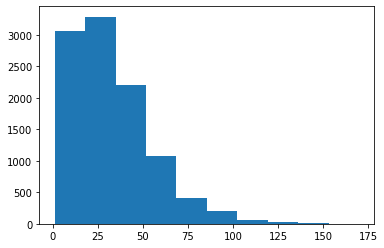

In [34]:
plt.hist(passes_df['total_pass'])

Assumption is that a player in a match less than 25 Passes, so he has not played enough time in a game. 25 means the data in 10% percentile avoided.

In [35]:
passes_df = passes_df.loc[passes_df['total_pass'] > 25]
passes_df.head()

,playerId,matchId,successive_pass,total_pass
6,36,2499725,90.0,99
7,36,2499737,68.0,74
8,36,2499746,66.0,72
9,36,2499752,41.0,49
10,36,2499766,81.0,91


In [36]:
passes_df.drop(columns = ['matchId'], inplace = True) #dropping extra column

## Creating an Success rate

In [37]:
passes_df = passes_df.groupby('playerId').agg('sum', level = 0, on = ['Successive_pass', 'total_pass']).reset_index()
passes_df.head()

,playerId,successive_pass,total_pass
0,36,789.0,897
1,38,190.0,219
2,48,2113.0,2370
3,54,1803.0,2196
4,74,1047.0,1125


In [38]:
passes_df['pass_success_rate %'] = passes_df['successive_pass']/passes_df['total_pass']*100
passes_df.head()

,playerId,successive_pass,total_pass,pass_success_rate %
0,36,789.0,897,87.959866
1,38,190.0,219,86.757991
2,48,2113.0,2370,89.156118
3,54,1803.0,2196,82.103825
4,74,1047.0,1125,93.066667


## Outcome

In [39]:
passes_top10 = passes_df.sort_values('pass_success_rate %', ascending=False).head(20)
passes_top10

,playerId,successive_pass,total_pass,pass_success_rate %
51,7864,30.0,30,100.000000
199,9380,1164.0,1193,97.569153
335,104851,28.0,29,96.551724
27,3343,37.0,39,94.871795
129,8324,365.0,386,94.559585
145,8464,1463.0,1548,94.509044
325,77550,84.0,89,94.382022
124,8307,1301.0,1380,94.275362
349,135103,1177.0,1249,94.235388
50,7856,196.0,208,94.230769


## Removing the Goal Keeper from Players Data
the goal keeper is role in a match that mostly passes to defenders and its ratio will be maximum and biased the results.

In [40]:
players_df = pd.read_json(r"soccer data/players.json")
players_df = players_df.loc[[str(t).find('GK') == -1 for t in players_df.role]]
players_df.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48


## Joining names

In [41]:
players_name = players_df[['firstName','middleName','lastName', 'wyId']].copy()
players_name['fullName'] = players_name['firstName'] + ' ' + players_name['middleName'] + ' ' + players_name['lastName']
players_name.head()

,firstName,middleName,lastName,wyId,fullName
1,Malang,,Sarr,393228,Malang Sarr
3,Alfred John Momar,,N'Diaye,32793,Alfred John Momar N'Diaye
4,Ibrahima,,Konat\u00e9,393247,Ibrahima Konat\u00e9
6,Toby,,Alderweireld,36,Toby Alderweireld
7,Jan,,Vertonghen,48,Jan Vertonghen


## Dropping extra columns

In [42]:
players_name.drop(columns = ['firstName', 'middleName', 'lastName'], inplace = True)
players_name.head()

,wyId,fullName
1,393228,Malang Sarr
3,32793,Alfred John Momar N'Diaye
4,393247,Ibrahima Konat\u00e9
6,36,Toby Alderweireld
7,48,Jan Vertonghen


## Joining Names over IDs

In [43]:
passes_top10 = pd.merge(left=passes_top10, right=players_name, left_on='playerId', right_on='wyId', how='inner').head(10)

## Final Results

In [44]:
passes_top10[['fullName','pass_success_rate %']]

,fullName,pass_success_rate %
0,Francis Coquelin,100.000000
1,John Stones,97.569153
2,Ibrahim Afellay,94.871795
3,Gn\u00e9gn\u00e9ri Yaya Tour\u00e9,94.559585
4,Fabian Delph,94.509044
5,Leon Britton,94.382022
6,Vincent Kompany,94.275362
7,Andreas Christensen,94.235388
8,Per Mertesacker,94.230769
9,Phil Jones,94.052419


## RQ 5

In [45]:
airduels_df = events_df[['playerId', 'matchId', 'eventName', 'subEventName', 'tags']] # already Imported data
airduels_df.head()

,playerId,matchId,eventName,subEventName,tags
0,25413,2499719,Pass,Simple pass,[{'id': 1801}]
1,370224,2499719,Pass,High pass,[{'id': 1801}]
2,3319,2499719,Pass,Head pass,[{'id': 1801}]
3,120339,2499719,Pass,Head pass,[{'id': 1801}]
4,167145,2499719,Pass,Simple pass,[{'id': 1801}]


## Assessing Duel Success

In [46]:
airduels_df = airduels_df.loc[airduels_df.subEventName == 'Air duel']
airduels_df = airduels_df.loc[airduels_df.eventName == 'Duel']
airduels_df['duel_success'] = [str(t).find('1801') != -1 for t in airduels_df.tags]
airduels_df.drop(columns=['tags','eventName', 'subEventName'], inplace = True)
airduels_df.head()

,playerId,matchId,duel_success
7,8013,2499719,False
8,0,2499719,True
12,8653,2499719,True
13,25413,2499719,False
27,192748,2499719,True


## Summarize Player and Match wise Air Duels

In [47]:
airduels_df = airduels_df.groupby(['playerId', 'matchId'], as_index = False, group_keys = False).agg(['sum','count'] , on='duel_success').reset_index()
airduels_df.columns = ['playerId', 'matchId', 'success_duels', 'total_duels']
airduels_df = airduels_df.loc[airduels_df['playerId'] != 0]
airduels_df.head()

,playerId,matchId,success_duels,total_duels
339,36,2499725,4.0,6
340,36,2499737,3.0,7
341,36,2499746,5.0,11
342,36,2499752,4.0,5
343,36,2499766,0.0,3


Assumption Considering players in each game made greater than 5 Air duels, defines that player has played enough in game

In [48]:
airduels_df = airduels_df.loc[airduels_df['total_duels'] > 5]
airduels_df.head()

,playerId,matchId,success_duels,total_duels
339,36,2499725,4.0,6
340,36,2499737,3.0,7
341,36,2499746,5.0,11
354,38,2499744,5.0,8
359,48,2499746,5.0,9


## Success Rate

In [49]:
airduels_df = airduels_df.groupby(airduels_df["playerId"]).sum(on = ['success_duels' , 'total_duels']).reset_index()[['playerId','success_duels','total_duels']]
airduels_df['success_ratio'] = airduels_df['success_duels']/airduels_df['total_duels']*100
airduels_df.head()

,playerId,success_duels,total_duels,success_ratio
0,36,12.0,24,50.000000
1,38,5.0,8,62.500000
2,48,91.0,127,71.653543
3,74,59.0,99,59.595960
4,93,20.0,37,54.054054


## Reffering Player ID with Height

In [50]:
players_height = players_df[['height', 'wyId']].copy()
players_height.head()

,height,wyId
1,182,393228
3,187,32793
4,192,393247
6,187,36
7,189,48


## Joining Height with Player ID

In [51]:
airduels_height = pd.merge(left=airduels_df, right=players_height, left_on='playerId', right_on='wyId', how='inner')[['height', 'success_ratio']]

In [52]:
airduels_height.head()

,height,success_ratio
0,187,50.000000
1,180,62.500000
2,189,71.653543
3,187,59.595960
4,186,54.054054


## Creating Range of Heights for a enhanced Visualization of result

In [53]:
airduels_height['height_range'] = pd.cut(airduels_height["height"], np.arange(165, 210, 5))
airduels_height.head()

,height,success_ratio,height_range
0,187,50.000000,"(185, 190]"
1,180,62.500000,"(175, 180]"
2,189,71.653543,"(185, 190]"
3,187,59.595960,"(185, 190]"
4,186,54.054054,"(185, 190]"


## Result
Based on the scatter plot it can be seen that from heigth range 170 to 185 the success rate is from 20% to 60% whereas for range 185 to 195 the success rate 45% to 90% which clearly refelcts that height and success rate is directly proportoinal.

Text(0.5, 0, 'Height')

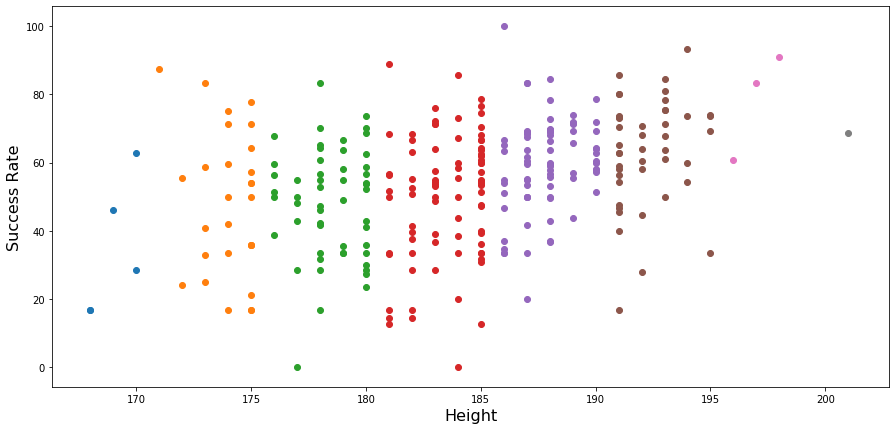

In [54]:
plt.figure(figsize=(15,7))
ranges = pd.unique(airduels_height['height_range']).sort_values()
for i,r in enumerate(ranges):
    temp_df = airduels_height.loc[airduels_height['height_range'] == r]
    plt.scatter(x = temp_df['height'], y = temp_df['success_ratio'])
plt.ylabel('Success Rate', fontsize = 16)
plt.xlabel('Height', fontsize = 16)

## RQ6
We will observe that which are the top 10 nationlities playing in Premier league

we considered the player iD of premier league only

In [55]:
players_pl = pd.DataFrame(pd.unique(events_df['playerId']), columns=['playerId'])
players_pl.head()

,playerId
0,25413
1,370224
2,3319
3,120339
4,167145


extracted and cleaned Nationality from Passport area.
3 of unformatted nationalities were changed as Unidentifed

In [56]:
players_nat = players_df[['passportArea', 'wyId']].copy()
nationality = [str(s).split()[1].replace("'", '').strip(',') if str(s).split()[1].replace("'", '').strip(',').find("\\") == -1 else 'unIdentified' for s in players_nat['passportArea']]
players_nat['nationality'] = nationality

Joining the Player and Nationality

In [57]:
players_pl_nat = pd.merge(left=players_pl, right=players_nat, left_on='playerId', right_on='wyId', how = 'inner')

## Plotting

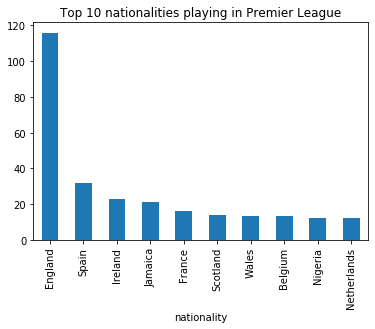

In [58]:
players_pl_nat.groupby('nationality').count()[['playerId']].sort_values(by = 'playerId', ascending = False).iloc[0:10,:].plot(kind='bar', legend=False,title='Top 10 nationalities playing in Premier League')

## CRQ1

# Importing Dataset

In [59]:
events_df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


## Relevent Columns and in a new defined Dataset for Goals

In [60]:
goals_df = events_df[['playerId', 'eventSec','teamId','tags','eventName', 'matchPeriod']]

In [61]:
goals_df.head()

,playerId,eventSec,teamId,tags,eventName,matchPeriod
0,25413,2.758649,1609,[{'id': 1801}],Pass,1H
1,370224,4.946850,1609,[{'id': 1801}],Pass,1H
2,3319,6.542188,1609,[{'id': 1801}],Pass,1H
3,120339,8.143395,1609,[{'id': 1801}],Pass,1H
4,167145,10.302366,1609,[{'id': 1801}],Pass,1H


## Identifying Successive Goals
tag 101 is defined as successive goals

In [62]:
tags101 = [str(t).find(' 101') != -1 for t in goals_df['tags']] # 

In [63]:
goals_df = goals_df.loc[tags101]

In [64]:
goals_df.head()

,playerId,eventSec,teamId,tags,eventName,matchPeriod
46,25413,94.595788,1609,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H
47,8480,96.970614,1631,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",Save attempt,1H
91,14763,254.745027,1631,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",Shot,1H
92,7882,256.547834,1609,"[{'id': 101}, {'id': 1207}, {'id': 1802}]",Save attempt,1H
554,12829,1710.855093,1631,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H


In [65]:
goals_df = goals_df.loc[goals_df['eventName'] != 'Save attempt']# removing save attempts

## changing Seconds into Minute of Goal

In [66]:
goals_df['eventMin'] = goals_df['eventSec']//60 + 1

In [67]:
goals_df.head()

,playerId,eventSec,teamId,tags,eventName,matchPeriod,eventMin
46,25413,94.595788,1609,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H,2.0
91,14763,254.745027,1631,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",Shot,1H,5.0
554,12829,1710.855093,1631,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H,29.0
898,7945,2815.900791,1609,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H,47.0
1107,12829,634.312236,1631,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",Shot,2H,11.0


## Setting up time Ranges as per the Question

In [68]:
time_slots = [t for t in pd.cut(goals_df['eventMin'], np.arange(0, 60, 9))]

In [69]:
goals_df['time_slot'] = time_slots

In [70]:
goals_df.head()

,playerId,eventSec,teamId,tags,eventName,matchPeriod,eventMin,time_slot
46,25413,94.595788,1609,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H,2.0,"(0, 9]"
91,14763,254.745027,1631,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",Shot,1H,5.0,"(0, 9]"
554,12829,1710.855093,1631,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H,29.0,"(27, 36]"
898,7945,2815.900791,1609,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",Shot,1H,47.0,"(45, 54]"
1107,12829,634.312236,1631,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",Shot,2H,11.0,"(9, 18]"


## Summerizing the Goals in range for each player , segregating by Match Halves

In [71]:
res = goals_df.groupby(['matchPeriod', 'time_slot']).count()[['playerId']]
res.columns = ['Goals']

In [72]:
res.sort_index()

Goals
matchPeriod time_slot       
1H          (0, 9]        70
            (9, 18]       75
            (18, 27]      85
            (27, 36]      72
            (36, 45]      87
            (45, 54]      24
2H          (0, 9]       104
            (9, 18]      101
            (18, 27]     101
            (27, 36]     115
            (36, 45]     105
            (45, 54]      49

## Result (i) : Barplot with the absolute frequency of goals in all the time slots.

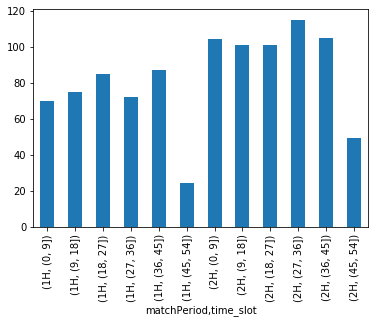

In [73]:
res_plot = res.plot(kind='bar', legend=False)

## merging and filtering the Dataset with time duration 81 to 90 Mins, or 2H (36 to 45) Mins

In [74]:
res1 = goals_df.groupby(['teamId', 'time_slot', 'matchPeriod']).count()[['playerId']].reset_index()
res1.columns = ['teamId','time_slot','matchPeriod','scores']
res1 = res1.loc[[str(t) == '(36, 45]' for t in res1['time_slot']]]
res1 = res1.loc[[str(t).find('2H') != -1 for t in res1['matchPeriod']]]

In [75]:
res1 = pd.merge(left = res1, right=teams_df, left_on='teamId', right_on='wyId')[['time_slot','matchPeriod','scores','officialName']]

## Result (ii) : Find the top 10 teams that score the most in the interval "81-90"

In [76]:
res1.sort_values('scores', ascending=False).head(10)

,time_slot,matchPeriod,scores,officialName
8,"(36, 45]",2H,13,Manchester City FC
0,"(36, 45]",2H,11,Arsenal FC
2,"(36, 45]",2H,9,Manchester United FC
1,"(36, 45]",2H,9,Chelsea FC
3,"(36, 45]",2H,7,Liverpool FC
10,"(36, 45]",2H,7,Crystal Palace FC
14,"(36, 45]",2H,7,Watford FC
12,"(36, 45]",2H,6,West Ham United FC
17,"(36, 45]",2H,5,AFC Bournemouth
7,"(36, 45]",2H,5,Tottenham Hotspur FC


## summerizing the count of goal provided the condition of atleast one goal in 8 different Interval

In [77]:
res2 = goals_df.groupby(['time_slot','playerId']).count().reset_index()[['time_slot','playerId','tags']]
res2.columns = ['time_slot','playerId','scores']

In [78]:
res2.head()

,time_slot,playerId,scores
0,"(0, 9]",54,3
1,"(0, 9]",160,1
2,"(0, 9]",173,1
3,"(0, 9]",383,1
4,"(0, 9]",454,1


In [79]:
res2 = res2.groupby('playerId').count().reset_index()[['playerId','time_slot']]
res2.columns = ['playerId', 'nslot_covered']

## Result (iii) : Show if there are players that were able to score at least one goal in 8 different intervals
so we observed that thee is no player who goal in all intervals

In [80]:
res2.sort_values(by = 'nslot_covered', ascending=False).head()

,playerId,nslot_covered
173,26150,6
141,15808,6
210,120353,6
129,12829,6
130,13484,6


## CRQ2

In [96]:
events_df.head() # take a look at data

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [97]:
pd.unique(events_df['eventName']) # identifying the events

array(['Pass', 'Duel', 'Foul', 'Free Kick', 'Shot', 'Save attempt',
       'Others on the ball', 'Interruption', 'Goalkeeper leaving line',
       'Offside'], dtype=object)

## Importing Match and Event Data of Spain

In [95]:
with zipfile.ZipFile("Soccer Data\matches.zip") as Z:
    with Z.open('matches_Spain.json') as f:
            matches_df = pd.read_json(f)
with zipfile.ZipFile("Soccer Data\events.zip") as Z:
    with Z.open('events_Spain.json') as f:
            events_spain_df = pd.read_json(f)

In [86]:
barcelona_madrid_id = 2565907 #Barcelona - Real Madrid
CR7_id = 3359  # CR7 (Critiano Ronaldo)
LM_id = 3322   # Messi

Extract the start and end coordination of the given events and scale it to a pitch of size 90x130, The scale of the given data is 100x100.

In [83]:
def event_coordinate(coordinate):
    [[_,y_start],[_,x_start],[_,y_end],[_,x_end]] = [i.split(': ') for i in str(coordinate).replace('[','').replace(']','').replace('{','').replace('}','').split(',')]
    return int(x_start)/100*130, int(y_start)/100*90, int(x_end)/100*130, int(y_end)/100*90

## Filtering the data with (passes shots duel and free kcick) for Ronaldo and Messi

In [87]:
barcelona_madrid_df = events_spain_df[['eventName','matchId','positions','playerId']].loc[
    events_spain_df['eventName'].isin(['Pass', 'Duel','Free Kick','Shot']) & 
    events_spain_df['matchId'].isin([barcelona_madrid_id]) &
    events_spain_df['playerId'].isin([CR7_id])]
xy_CR7 = barcelona_madrid_df['positions'].apply(event_coordinate)
xy_CR7 = xy_CR7.loc[[i[2] != 0 and i[3] != 0 for i in xy_CR7]]

In [88]:
barcelona_madrid_df = events_spain_df[['eventName','matchId','positions','playerId']].loc[
    events_spain_df['eventName'].isin(['Pass', 'Duel','Free Kick','Shot']) & 
    events_spain_df['matchId'].isin([barcelona_madrid_id]) &
    events_spain_df['playerId'].isin([LM_id])]
xy_LM = barcelona_madrid_df['positions'].apply(event_coordinate)
xy_LM = xy_CR7.loc[[i[2] != 0 and i[3] != 0 for i in xy_LM]]

## Plotting the clear pitch

In [89]:
from matplotlib.patches import Arc
import seaborn as sns
#Create figure
def plot_pitch():
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")

    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")

    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')

## CR7 heatmap
Ronaldo is a good CAM player that well equipped with good dribbling and finishing skills. At times he even play as CF/Striker to support attack or as contingency plans.

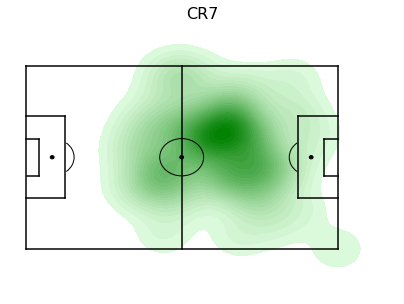

In [92]:
plot_pitch()
x_coord = [i[0] for i in xy_CR7]
y_coord = [i[1] for i in xy_CR7]
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30, shade_lowest = False)
plt.title('CR7', fontsize = 16)
plt.show()

## Messi heatmap
We can observe that messi is more of CM (center-midfielder) player and more support striker and forwards and inclined to left side.

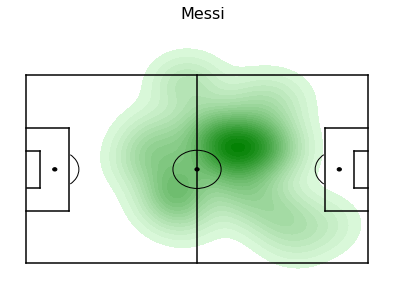

In [94]:
plot_pitch()
x_coord = [i[0] for i in xy_LM]
y_coord = [i[1] for i in xy_LM]
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30, shade_lowest = False)
plt.title('Messi', fontsize = 16)
plt.show()

## Import Match and event for Italy

In [98]:
with zipfile.ZipFile("Soccer Data\matches.zip") as Z:
    with Z.open('matches_Italy.json') as f:
            matches_df = pd.read_json(f)
with zipfile.ZipFile("Soccer Data\events.zip") as Z:
    with Z.open('events_Italy.json') as f:
            events_italy_df = pd.read_json(f)

In [99]:
juventus_napoli_id = 2576295 #juventus - napoli
Jorg_id = 21315  # Jorginho
Pjan_id = 20443 # Miralem Pjanic

In [100]:
juventus_napoli_df = events_italy_df[['eventName','matchId','positions','playerId']].loc[
    events_italy_df['eventName'].isin(['Pass', 'Duel','Free Kick','Shot']) & 
    events_italy_df['matchId'].isin([juventus_napoli_id]) &
    events_italy_df['playerId'].isin([Jorg_id])]
xy_Jorg = juventus_napoli_df['positions'].apply(event_coordinate)
xy_Jorg = xy_Jorg.loc[[i[2] != 0 and i[3] != 0 for i in xy_Jorg]]

## Jorginho
Jorginho's intensive role is right wing, however he is supporting right and center strikers and forwards 

Text(0.5, 1.0, 'Jorginho')

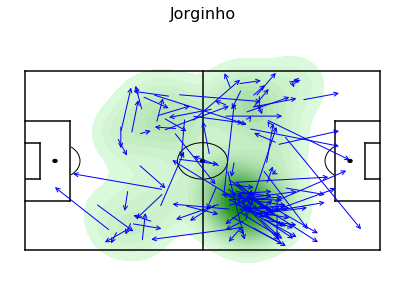

In [105]:
plot_pitch()
x_coord = [i[0] for i in xy_Jorg]
y_coord = [i[1] for i in xy_Jorg]
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30, shade_lowest = False)
for xy in xy_Jorg:
    plt.annotate(xy = [xy[2],xy[3]], arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),s ='',
                 xytext = [xy[0],xy[1]])
plt.title('Jorginho', fontsize=16)

## Pjanic
Like Jorginho, Pjanic role is right wing, but he is more active on center one-third of the pitch in comparison to Jorginho. It should be mentioned that generally Jorjinho support other players more than Pjanic. 

In [106]:
juventus_napoli_df = events_italy_df[['eventName','matchId','positions','playerId']].loc[
    events_italy_df['eventName'].isin(['Pass', 'Duel','Free Kick','Shot']) & 
    events_italy_df['matchId'].isin([juventus_napoli_id]) &
    events_italy_df['playerId'].isin([Pjan_id])]
xy_Pjan = juventus_napoli_df['positions'].apply(event_coordinate)
xy_Pjan = xy_Jorg.loc[[i[2] != 0 and i[3] != 0 for i in xy_Pjan]]

Text(0.5, 1.0, 'Pjanic')

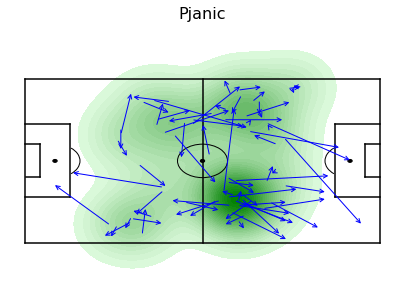

In [107]:
plot_pitch()
#plt.title('asdasd')
x_coord = [i[0] for i in xy_Pjan]
y_coord = [i[1] for i in xy_Pjan]
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30, shade_lowest = False)
for xy in xy_Pjan:
    plt.annotate(xy = [xy[2],xy[3]], arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),s ='',
                 xytext = [xy[0],xy[1]])
plt.title('Pjanic', fontsize=16)